Student name:              *Ali Jaabous*

Matriculation nr:          *612979*

module name:               *Advanced data analytics for management support*

semester:                  *Summer semester 2022*

# Table of Contents

1. Installing and Importing the libraries and data

2. Cleaning and pre_processing (Training data)

3. Exploratory data analysis

4. Setup of the Predictive model

5. Cleaning and pre_processing (Test data)

6. Application of the Predictive model

7. Conclusion




  ---




#Installing and Importing the libraries and data

In [ ]:
#install libraries
!pip3 install torch torchvision torchaudio
!pip install transformers requests beautifulsoup4 pandas numpy
!pip install tqdm
!pip install geopandas

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#load libraries
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import time
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load training data 
df_train = pd.read_csv('https://github.com/Alij13/ADAMS_Assignment_2022/raw/main/train.csv')
# load test data
df_test = pd.read_csv('https://github.com/Alij13/ADAMS_Assignment_2022/raw/main/test.csv')

#Cleaning and pre-processing (Training data)

###Eyeballing the data

In [ ]:
# Query some properties of the training data
print('Dimensionality of the data is {}'.format(df_train.shape))  
print('The data set has {} listings.'.format(df_train.shape[0]))     
print('The total number of elements is {}.'.format(df_train.size))

print("")

# Query some properties of the test data
print('Dimensionality of the data is {}'.format(df_test.shape)) 
print('The data set has {} listings.'.format(df_test.shape[0]))
print('The total number of elements is {}.'.format(df_test.size))

Dimensionality of the data is (55284, 42)
The data set has 55284 listings.
The total number of elements is 2321928.

Dimensionality of the data is (29769, 41)
The data set has 29769 listings.
The total number of elements is 1220529.


In [ ]:
df_train.describe()

,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,5.528400e+04,55173.000000,55284.000000,55284.000000,55284.000000,55214.000000,55222.000000,55022.000000,55284.000000,55284.000000,41869.000000,41836.000000,41842.000000,41801.000000,41838.000000,41804.000000,41804.000000,42904.000000
mean,8.817998e+07,20.704475,51.509971,-0.126962,3.131756,1.283850,1.373873,1.710661,104.308751,1.574832,92.533044,9.502868,9.261484,9.622043,9.652851,9.541623,9.262846,1.164464
std,9.013224e+07,117.029690,0.046741,0.093517,1.930209,0.566556,0.859448,1.224301,83.740407,1.263427,10.030620,0.982464,1.138548,0.894931,0.873805,0.810408,1.033351,1.353820
min,2.697000e+03,0.000000,51.294790,-0.496680,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,1.526397e+07,1.000000,51.485300,-0.187632,2.000000,1.000000,1.000000,1.000000,45.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.240000
50%,4.816502e+07,2.000000,51.514330,-0.124510,2.000000,1.000000,1.000000,1.000000,80.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.730000
75%,1.449050e+08,5.000000,51.537960,-0.068820,4.000000,1.500000,2.000000,2.000000,130.000000,2.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.570000
max,3.256719e+08,1321.000000,51.681690,0.285390,16.000000,11.000000,19.000000,21.000000,500.000000,46.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,22.040000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55284 entries, 0 to 55283
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         55270 non-null  object 
 1   summary                      52330 non-null  object 
 2   space                        38403 non-null  object 
 3   description                  53558 non-null  object 
 4   experiences_offered          55284 non-null  object 
 5   neighborhood_overview        35778 non-null  object 
 6   transit                      35477 non-null  object 
 7   house_rules                  31906 non-null  object 
 8   picture_url                  55284 non-null  object 
 9   host_id                      55284 non-null  int64  
 10  host_since                   55173 non-null  object 
 11  host_response_time           37482 non-null  object 
 12  host_response_rate           37482 non-null  object 
 13  host_is_superhos

In [ ]:
pd.set_option('display.max_columns', len(df_train.columns)) # to view all columns
df_train.head(5)

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,business,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...,2167992,2012-04-18,within an hour,100%,t,1.0,t,f,Greenwich,Greenwich,SE10 8SX,51.47457,-0.01062,Townhouse,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Wifi,""Paid parking off premises"",Heating,Wash...",35.0,1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.37,9Q1RD6H7IO
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",none,Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...,16148175,2014-05-29,within a few hours,100%,t,1.0,t,t,LB of Haringey,Haringey,N8 8NR,51.58329,-0.12416,Guesthouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Free parking on premises"",Breakfast,...",75.0,2,99.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.97,6XDPZPGLSR
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,2019-06-28,within an hour,100%,f,2.0,t,f,LB of Merton,Merton,SW19 1DG,51.41634,-0.18567,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",120.0,2,84.0,9.0,9.0,10.0,10.0,9.0,8.0,strict_14_with_grace_period,1.73,SND9OPN6IY
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,none,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...,3361233,2012-08-24,within a few hours,100%,f,1.0,t,f,Clapham,Lambeth,SW4 9EF,51.45622,-0.14137,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",50.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,SE3B7BXN9G
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",none,NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...,94317022,2016-09-09,within an hour,100%,t,2.0,t,f,LB of Lambeth,Lambeth,SE11 5TL,51.48114,-0.11219,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",104.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.32,E0C82VK0VF


###Handling missing values

Within the first sighting it becomes obvious that the given data set has many missing values, which are remedied differently in the following.

In [ ]:
df_test.isna().sum()

name                              10
summary                         1577
space                           9057
description                      943
experiences_offered                0
neighborhood_overview          10551
transit                        10672
house_rules                    12580
picture_url                        0
host_id                            0
host_since                        65
host_response_time              9572
host_response_rate              9572
host_is_superhost                 65
host_total_listings_count         65
host_has_profile_pic              65
host_identity_verified            65
neighbourhood                     86
neighbourhood_cleansed             0
zipcode                          635
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         50
bedrooms                          29
b

In [ ]:
# using the feature 'listing_id' as the new index of the data set
df_train.set_index('listing_id', inplace=True)

df_test.set_index('listing_id', inplace=True)

#### Dropping columns with low to no information content



*   **experiences_offered**: after screening the different values within this category it becomes apparent that the majority embraces a certain value. This leads de facto to low information content, which is the reason why this feature is dropped.
*   **bed_type**: see reasoning for 'experiences_offered'
*   **summary**: After exploring the features that have free text, it was noticed that all values of the feature 'summary' are included within the feature 'description', so this feature can be discarded.  



In [ ]:
df_train.experiences_offered.value_counts()

none        54222
business      364
family        300
social        266
romantic      132
Name: experiences_offered, dtype: int64

In [ ]:
df_train.drop('experiences_offered', axis=1, inplace=True)

In [ ]:
df_train.bed_type.value_counts()

Real Bed         54864
Pull-out Sofa      239
Futon              116
Couch               38
Airbed              27
Name: bed_type, dtype: int64

In [ ]:
df_train.drop('bed_type', axis=1, inplace=True)

In [ ]:
 # Replace nulls with 'unknown'
df_train.summary.fillna("unknown", inplace=True)
df_train.description.fillna("unknown", inplace=True)

In [ ]:
counter = 0
for i in df_train['summary'].index:
  if df_train['summary'][i] in df_train['description'][i] and df_train['description'][i] != "unknown" or df_train['summary'][i] != "unknown":
    counter = counter + 1
print(counter) # 55284 - 52330 = 2954 => Quantity of NaN's in summary

df_train.drop('summary', axis=1, inplace=True)

52330


#### Dropping rows with NaN's in multiple columns

The following variables all have the same number within the NaN listing, which is why the assumption was made that they could have identical coverage with regard to the associated rows. This is confirmed by the new resulting dimension, which has exactly 111 entries less.

*   **host_since**
*   **host_is_superhost** 
*   **host_total_listings_count**
*   **host_has_profile_pic**
*   **host_identity_verified**

In [ ]:
df_train = df_train.dropna(subset=['host_since','host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified'], how='all')
print('The data set has {} listings.'.format(df_train.shape[0]))


The data set has 55173 listings.


#### Treatment of variables with relevance for NLP processing

In [ ]:
# Replace nulls with 'unknown'
df_train.name.fillna("unknown", inplace=True)
df_train.description.fillna("unknown", inplace=True)
df_train.space.fillna("unknown", inplace=True)
df_train.neighborhood_overview.fillna("unknown", inplace=True)
df_train.transit.fillna("unknown", inplace=True)
df_train.house_rules.fillna("unknown", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_train.drop('picture_url', axis=1, inplace=True)
df_train.drop('amenities', axis=1, inplace=True) 

In [ ]:
# instantiate NLP model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
# Reduction and removal of critical list entries, with regard to exceeding the unit quantity of 512 of the BERT model.
df_train['space'][25051] = df_train['space'][25051].replace('.', '')
df_train['house_rules'][18362] = df_train['house_rules'][18362].replace('-', '')
df_train = df_train.drop(labels= ['AICSLLIEO3', 'LT7QA69DD2', 'X27W1A5XQI', 'RVP66R7D22', '4SLR60R074', 'WVRP8NA894', 'AJW95Z20R2'], axis=0)
print('The data set has {} listings.'.format(df_train.shape[0]))

The data set has 55166 listings.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# defining sentiment analysis method
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
# Within the submission, a csv file was included which can be used to skip the subsequent code around the sentiment analysis.

In [ ]:
# Application of the function to the individual free text features.
for i in tqdm(df_train['name'].index):
  if df_train['name'][i] != "unknown":
     df_train['name'][i] = sentiment_score(df_train['name'][i])
     
for i in tqdm(df_train['description'].index):
  if df_train['description'][i] != "unknown":
     df_train['description'][i] = sentiment_score(df_train['description'][i])

for i in tqdm(df_train['space'].index):
  if df_train['space'][i] != "unknown":
     df_train['space'][i] = sentiment_score(df_train['space'][i])

for i in tqdm(df_train['neighborhood_overview'].index):
  if df_train['neighborhood_overview'][i] != "unknown":
     df_train['neighborhood_overview'][i] = sentiment_score(df_train['neighborhood_overview'][i])

for i in tqdm(df_train['transit'].index):
  if df_train['transit'][i] != "transit":
     df_train['transit'][i] = sentiment_score(df_train['transit'][i])

for i in tqdm(df_train['house_rules'].index):
  if df_train['house_rules'][i] != "unknown":
     df_train['house_rules'][i] = sentiment_score(df_train['house_rules'][i])

  0%|          | 0/55166 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
  0%|          | 0/55166 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  4%|▍         | 2360/55166 [1:01:28<24:48:56,  1.69s/it]

In [ ]:
#df_train = pd.read_csv('your_path/df_train_nlp_done.csv')

#### Treatment of location-based features & Accommodation facilities



In [ ]:
df_train.neighbourhood.fillna("unknown", inplace=True)
#df_train.coordinate = df[['latitude', 'longitude']]
df_train.drop(['zipcode', 'latitude', 'longitude'], axis=1, inplace=True)

In [ ]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df_train[col].fillna(df_train[col].median(), inplace=True)

#### Treatment regarding host and review features

**host_since**


In [ ]:
# Converting to datetime
df_train.host_since = pd.to_datetime(df_train.host_since) 

# Calculating the number of days
df_train['host_active_days'] = (datetime(2022, 2, 9) - df_train.host_since).astype('timedelta64[D]')

# Removing the % sign from the host_response_rate string and converting to an integer
df_train.host_response_rate = df_train.host_response_rate.str[:-1].astype('float64')

# Bin into four categories
df_train.host_response_rate = pd.cut(df_train.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df_train.host_response_rate = df_train.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df_train.host_response_rate.replace('nan', 'unknown', inplace=True)
df_train.host_response_time.fillna("unknown", inplace=True)

#### Adjustment of the value range

In [ ]:
review_scores = df_train[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [ ]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df_train[col] = pd.cut(df_train[col], bins=bins, labels=labels, include_lowest=True)
    df_train[col] = df_train[col].astype('str')
    df_train[col].fillna(na_label, inplace=True)

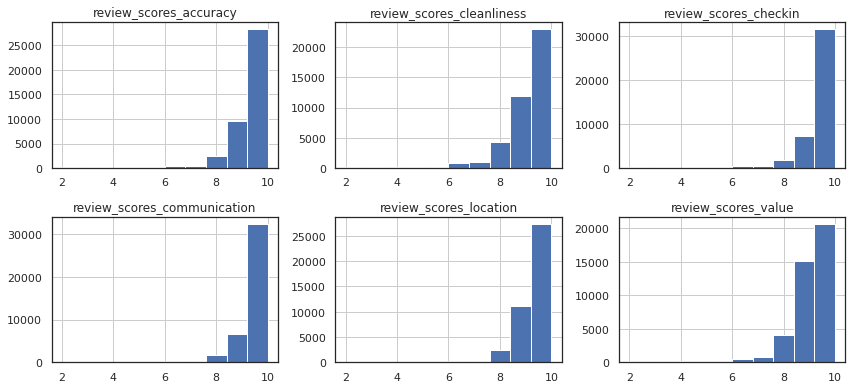

In [ ]:
# Checking the distributions of the review ratings columns
variables_to_plot = review_scores
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df_train[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
for col in review_scores:
    df_train[col] = df_train[col].astype(float)

# Binning for all columns scored out of 10
for col in review_scores:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label = 'unknown')
    
for col in review_scores:
    df_train[col] = df_train[col].replace('nan' , 'unknown')

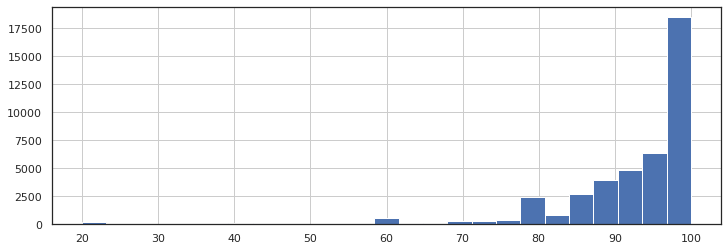

In [ ]:
# Distribution of the number of days since last review
df_train.review_scores_rating.hist(figsize=(12,4), bins=25);

In [ ]:
df_train['review_scores_rating'] = df_train['review_scores_rating'].astype(float)

# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='unknown')

df_train['review_scores_rating'] = df_train['review_scores_rating'].replace('nan' , 'unknown')

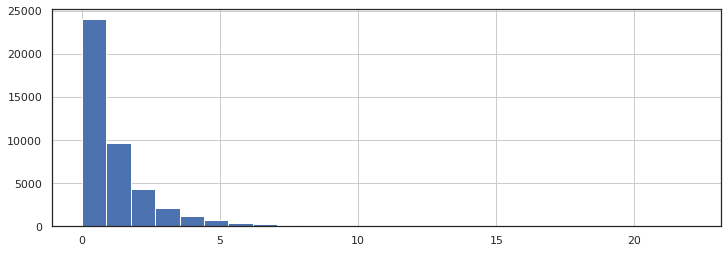

In [ ]:
# Distribution of the number of days since last review
df_train.reviews_per_month.hist(figsize=(12,4), bins=25);

In [ ]:
df_train['reviews_per_month'] = df_train['reviews_per_month'].astype(float)

# Binning column scored out of 100
bin_column('reviews_per_month',
           bins=[0, 1, 2, 3, 4, 5, 10, 25],
           labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-25'],
           na_label='unknown')

df_train['reviews_per_month'] = df_train['reviews_per_month'].replace('nan' , 'unknown')

In [ ]:
# Replacing categories
df_train.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_super_strict_95': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 1000 observations by category '5+'. 
guests_included_count = df_train['guests_included'].value_counts() 
df_train['guests_included'] = np.where(df_train['guests_included'].isin(guests_included_count[guests_included_count.lt(1000)].index),'5+',df_train['guests_included'])

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 1000 observations by category 'Other_borough'.
df_train['borough_copy'] =  df_train['neighbourhood_cleansed']
df_train.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)
borough_count = df_train['borough'].value_counts() 
df_train['borough'] = np.where(df_train['borough'].isin(borough_count[borough_count.lt(1000)].index),'Other_borough',df_train['borough'])

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 500 observations by category 'Other_neighborhood'. 
neighbourhood_count = df_train['neighbourhood'].value_counts() 
df_train['neighbourhood'] = np.where(df_train['neighbourhood'].isin(neighbourhood_count[neighbourhood_count.lt(1100)].index),'Other_neighbourhood',df_train['neighbourhood'])

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 2000 observations by category 'Other_property_type'.
property_type_count = df_train['property_type'].value_counts() 
df_train['property_type'] = np.where(df_train['property_type'].isin(property_type_count[property_type_count.lt(2000)].index),'Other_property_type',df_train['property_type'])

In [ ]:
nlp_col = df_train[['name', 'space', 'description', 'neighborhood_overview', 'house_rules']]

for col in nlp_col:
    df_train[col].replace({
      '5': 'positive',
      '4': 'positive',
      '3': 'neutral',
      '2': 'negative',
      '1': 'negative'
    }, inplace=True)

df_train['transit'].replace({
      5: 'positive',
      4: 'positive',
      3: 'neutral',
      2: 'negative',
      1: 'negative'
    }, inplace=True)

In [ ]:
# Replacing columns with f/t with 0/1
df_train.replace({'f': 0, 't': 1}, inplace=True)

#### Change data type

In [ ]:
cat_var = ['name', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'host_response_time', 'host_response_rate', 'neighbourhood', 'borough', 'property_type', 'room_type', 'guests_included', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'reviews_per_month']

In [ ]:
for col in cat_var:
    df_train[col] = df_train[col].astype('category')

In [ ]:
bin_var = df_train[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']]
for col in bin_var:
    df_train[col] = df_train[col].astype('boolean')

#Exploratory data analysis

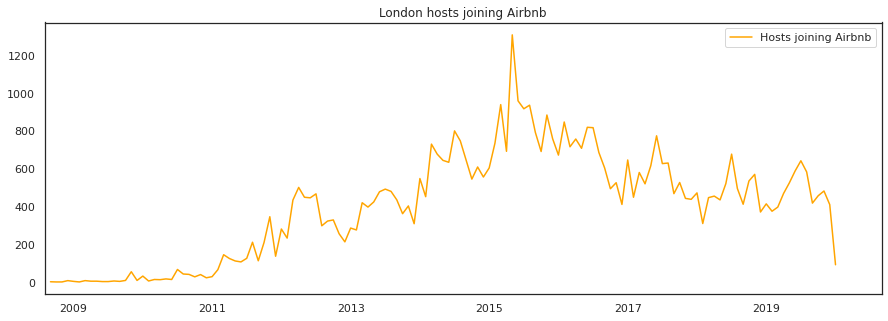

In [ ]:
plt.figure(figsize=(15,5))
df_train.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
#df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('London hosts joining Airbnb')
plt.legend()
plt.xlim('2008-08-01', '2020-09-01') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

Based on the upper graph, it can be seen that the number of new members of the platform reached its zenith in 2016/2017. A probable reason for the sharp drop in the number of new members after these years could be the initiation of the BREXIT process, which made the platform less attractive.

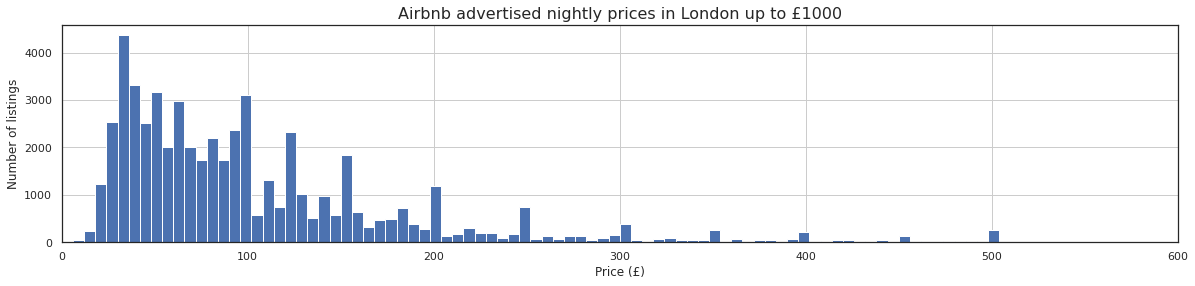

In [ ]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df_train.price.hist(bins=100, range=(0,600))
plt.margins(x=0)
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

Based on the graph considered above, it can be seen that a majority of the listed housing opportunities are in the range between 30 and 100 £. With this knowledge, it becomes clear in which price spectrum the predictions must be. 

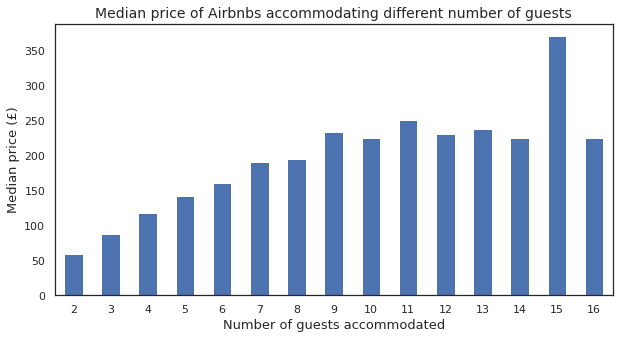

In [ ]:
plt.figure(figsize=(10,5))
df_train.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Within the upper graph, it can be seen that the feature (accommodates) must have a large influence on the price up to a certain level. The price increases steadily with the number of guests allowed until the value of 9, where it starts to stagnate and increases sharply from a value of 15. This increase can possibly be attributed to an outlier, since the value of the price drops sharply again at the value 16.

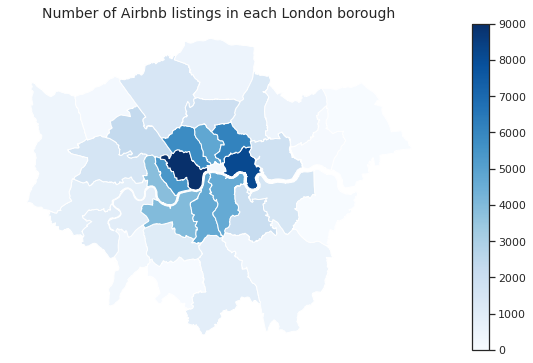

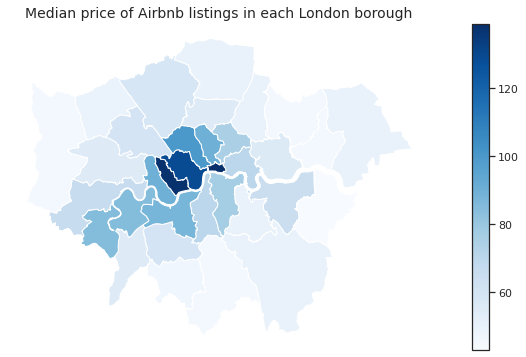

In [ ]:
# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('https://skgrange.github.io/www/data/london_boroughs.json')

# Dropping unnecessary columns
map_df = map_df.dropna(subset=['id', 'name' ,'code' , 'area_hectares', 'inner_statistical'], how='all')

# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df_train.groupby('borough_copy').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df_train.groupby('borough_copy').price.median().values

# Joining the dataframes
borough_map_df = map_df.set_index('name').join(borough_df)

# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each London borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each London borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

Using the two figures above, it quickly becomes apparent that the value of the price and the number of housing opportunities increase with increasing proximity to the city center (London). This is a typical feature of metropolitan areas such as London and Berlin, as the city center is home to historical as well as other important landmarks.

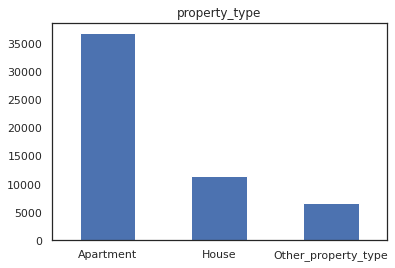

Apartment              0.668932
House                  0.208997
Other_property_type    0.122071
Name: property_type, dtype: float64


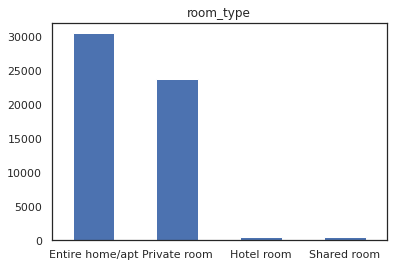

Entire home/apt    0.551719
Private room       0.430881
Hotel room         0.009769
Shared room        0.007631
Name: room_type, dtype: float64


In [ ]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df_train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(6,4))
    print(df_train[col].value_counts(normalize=True))

Regarding the feature property_type, the values Apartment and House take the majority of all possible values of the feature, despite the aggregation of all other values. The same is true for the feature room_type.

In [ ]:
# removing unnecessary features
df_train.drop('host_since', axis=1, inplace=True) 
df_train.drop('host_id', axis=1, inplace=True)   
df_train.drop('borough_copy', axis=1, inplace=True) 

#Setup of the Predicitve model

In [ ]:
transformed_df = pd.get_dummies(df_train)

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


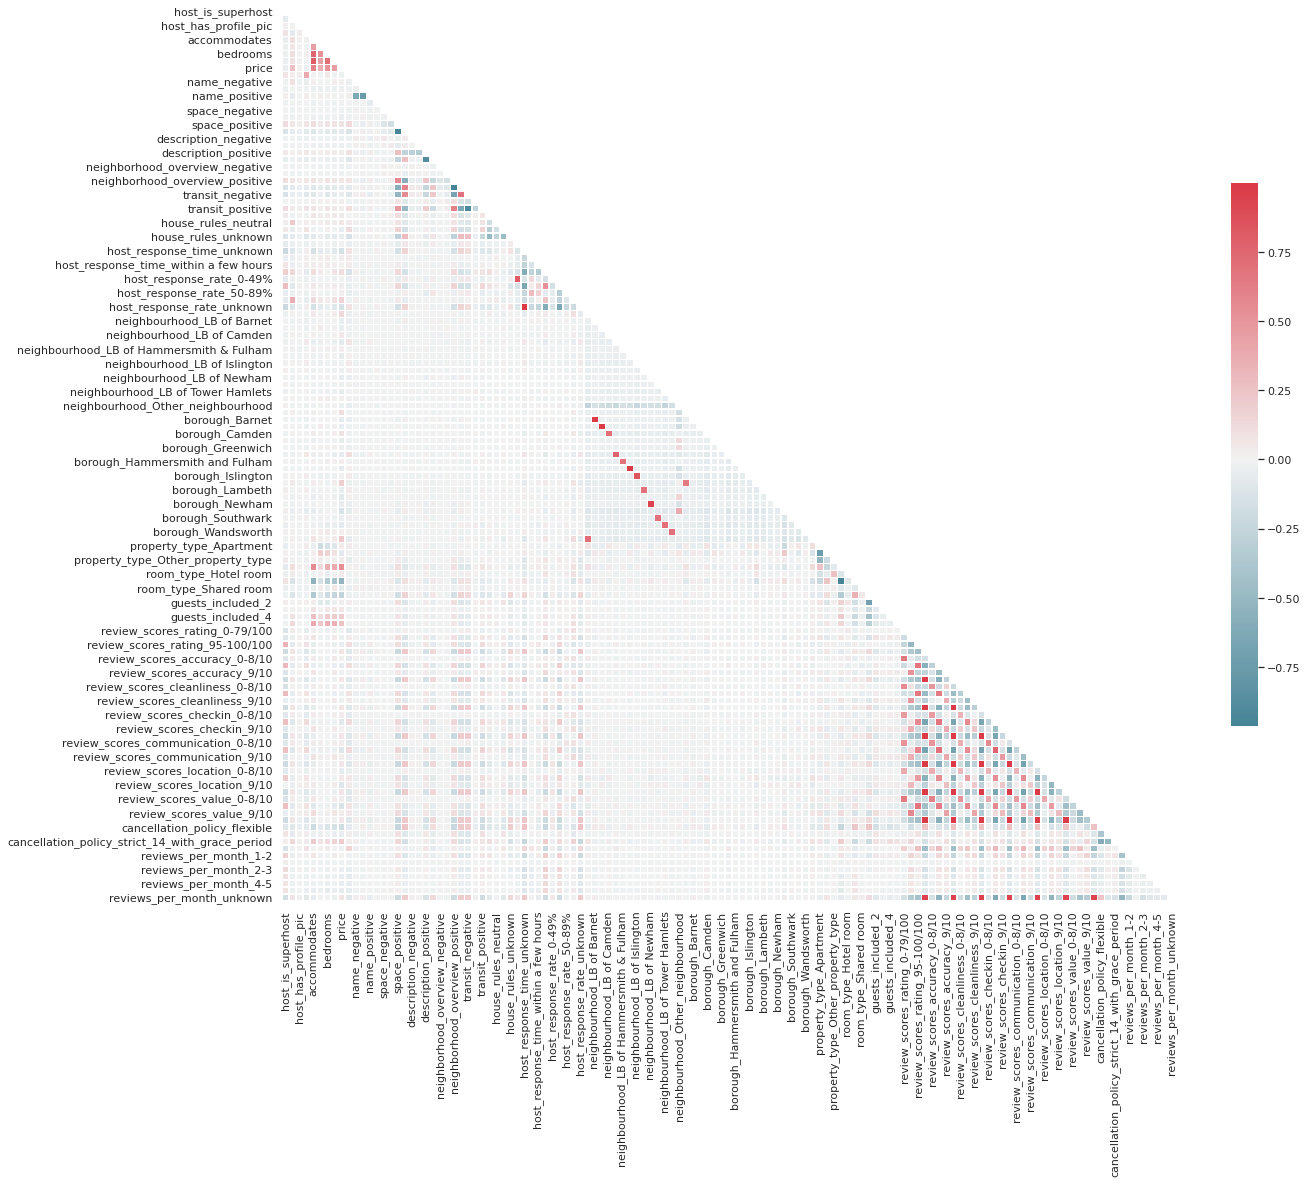

In [ ]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

In [ ]:
columns_to_drop1 = list(transformed_df.columns[transformed_df.columns.str.startswith("review_scores") == True])
columns_to_drop2 = list(transformed_df.columns[transformed_df.columns.str.startswith("borough") == True])
columns_to_drop = columns_to_drop1 + columns_to_drop2

for col in columns_to_drop:
    transformed_df.drop([col], axis=1, inplace=True)

transformed_df.drop(['bathrooms', 'bedrooms'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


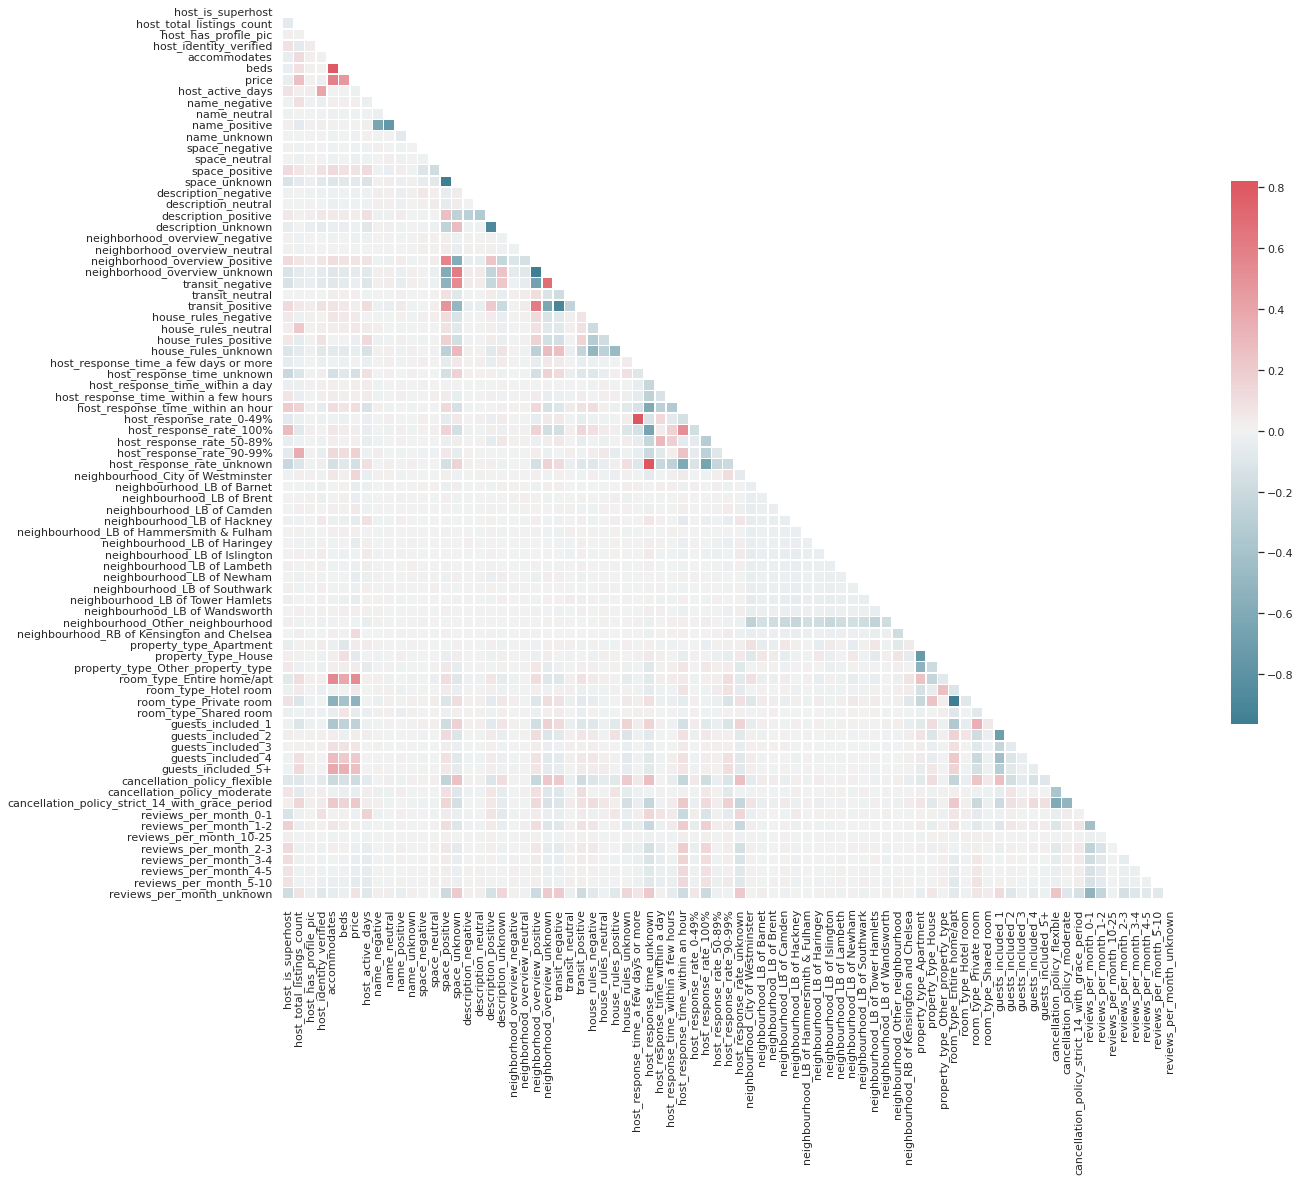

In [ ]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

In [ ]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[10:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 3249.2855
Validation MSE: 3310.0924

Training r2: 0.5356
Validation r2: 0.5311


In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighborhood_overview_neutral,0.000000
neighbourhood_LB of Islington,0.000000
host_response_rate_0-49%,0.000000
host_response_time_within an hour,0.000000
neighbourhood_LB of Lambeth,0.000000
...,...
guests_included_2,0.049812
host_identity_verified,0.050464
room_type_Entire home/apt,0.105136
accommodates,0.176728


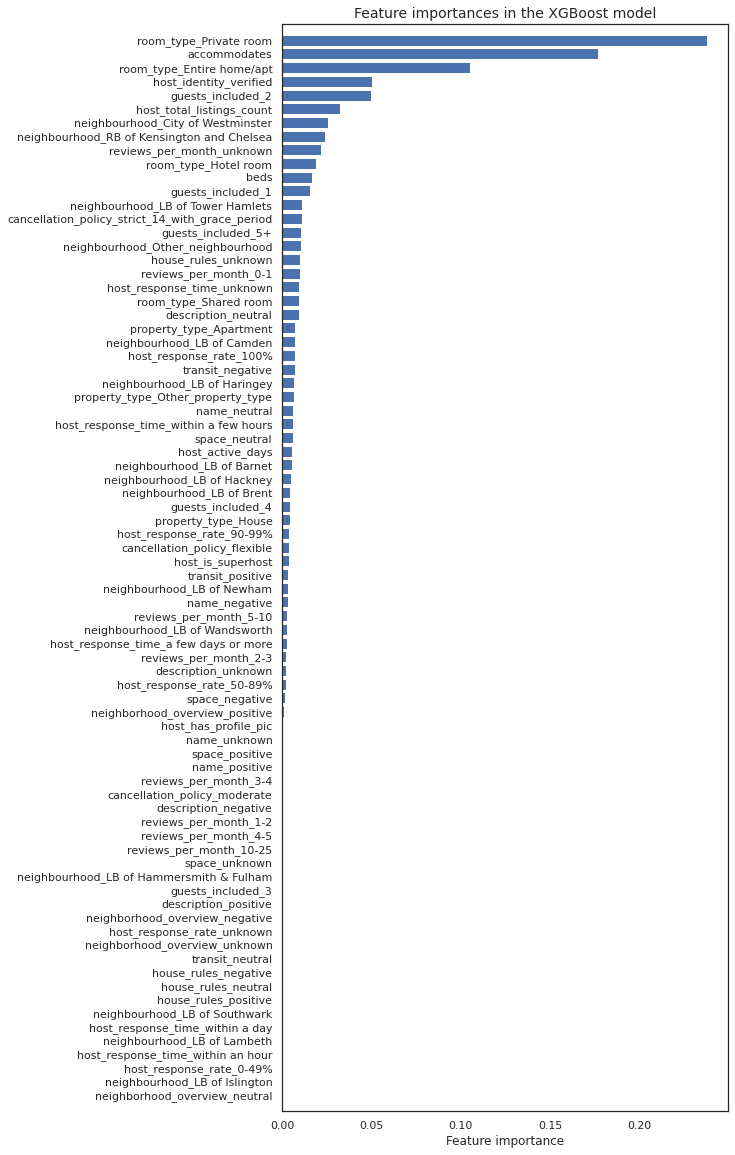

In [ ]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# Cleaning and pre-processing (Test data)

In [ ]:
df_test.isna().sum()

name                              10
summary                         1577
space                           9057
description                      943
experiences_offered                0
neighborhood_overview          10551
transit                        10672
house_rules                    12580
picture_url                        0
host_id                            0
host_since                        65
host_response_time              9572
host_response_rate              9572
host_is_superhost                 65
host_total_listings_count         65
host_has_profile_pic              65
host_identity_verified            65
neighbourhood                     86
neighbourhood_cleansed             0
zipcode                          635
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         50
bedrooms                          29
b

#### Treatment regarding host and review features

In [ ]:
# Converting to datetime
df_test.host_since = pd.to_datetime(df_test.host_since) 

# Calculating the number of days
df_test['host_active_days'] = (datetime(2022, 2, 9) - df_test.host_since).astype('timedelta64[D]')

# Removing the % sign from the host_response_rate string and converting to an integer
df_test.host_response_rate = df_test.host_response_rate.str[:-1].astype('float64')

# Bin into four categories
df_test.host_response_rate = pd.cut(df_test.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df_test.host_response_rate = df_test.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df_test.host_response_rate.replace('nan', 'unknown', inplace=True)
df_test.host_response_time.fillna("unknown", inplace=True)

#### Treatment of NaN's 

In [ ]:
df_test.drop('experiences_offered', axis=1, inplace=True)
df_test.drop('bed_type', axis=1, inplace=True)
df_test.drop('summary', axis=1, inplace=True)
df_test.drop('picture_url', axis=1, inplace=True) #Diese Zeile später nach oben verschieben zu den Spalten wenig bis keinen Informationsgehalt
df_test.drop('host_id', axis=1, inplace=True) #Diese Zeile später nach oben verschieben zu den Spalten wenig bis keinen Informationsgehalt
df_test.drop('host_since', axis=1, inplace=True) #Diese Zeile später nach oben verschieben zu den Spalten wenig bis keinen Informationsgehalt
df_test.drop('amenities', axis=1, inplace=True) #Diese Zeile später nach oben verschieben zu den Spalten wenig bis keinen Informationsgehalt
df_test.drop(['zipcode', 'latitude', 'longitude'], axis=1, inplace=True)

In [ ]:
df_test['host_is_superhost'].value_counts()

f    25197
t     4507
Name: host_is_superhost, dtype: int64

In [ ]:
df_test['host_has_profile_pic'].value_counts()

t    29605
f       99
Name: host_has_profile_pic, dtype: int64

In [ ]:
df_test['host_identity_verified'].value_counts()

f    19079
t    10625
Name: host_identity_verified, dtype: int64

In [ ]:
df_test.host_is_superhost.fillna("f", inplace=True)
df_test.host_has_profile_pic.fillna("f", inplace=True)
df_test.host_identity_verified.fillna("f", inplace=True)
df_test.host_total_listings_count.fillna(1.0 , inplace=True)
df_test.neighbourhood.fillna('Other_neighbourhood' , inplace=True)
df_test.host_active_days.fillna(df_test.host_active_days.mean() ,inplace=True)

for col in ['bathrooms', 'bedrooms', 'beds']:
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [ ]:
df_test['host_total_listings_count'].value_counts()

1.0       12996
2.0        4297
3.0        1897
0.0        1844
4.0        1133
          ...  
1287.0        1
145.0         1
837.0         1
200.0         1
514.0         1
Name: host_total_listings_count, Length: 100, dtype: int64

#### Treatment of variables with relevance for NLP processing

In [ ]:
# Replace nulls with 'unknown'
df_test.name.fillna("unknown", inplace=True)
df_test.description.fillna("unknown", inplace=True)
df_test.space.fillna("unknown", inplace=True)
df_test.neighborhood_overview.fillna("unknown", inplace=True)
df_test.transit.fillna("unknown", inplace=True)
df_test.house_rules.fillna("unknown", inplace=True)

In [ ]:
df_test['description'][3748:3749]  = 'unknown'
df_test['description'][18504:18505] = 'unknown'

In [ ]:
#Within the submission, a csv file was included which can be used to skip the subsequent code around the sentiment analysis.

In [ ]:
# Application of the function to the individual free text features.
for i in tqdm(df_test['name'].index):
  if df_test['name'][i] != "unknown":
     df_test['name'][i] = sentiment_score(df_test['name'][i])

for i in tqdm(df_test['description'].index):
  if df_test['description'][i] != "unknown":
     df_test['description'][i] = sentiment_score(df_test['description'][i])

for i in tqdm(df_test['space'].index):
  if df_test['space'][i] != "unknown":
     df_test['space'][i] = sentiment_score(df_test['space'][i])

for i in tqdm(df_test['neighborhood_overview'].index):
  if df_test['neighborhood_overview'][i] != "unknown":
     df_test['neighborhood_overview'][i] = sentiment_score(df_test['neighborhood_overview'][i])

for i in tqdm(df_test['transit'].index):
  if df_test['transit'][i] != "transit":
     df_test['transit'][i] = sentiment_score(df_test['transit'][i])

for i in tqdm(df_test['house_rules'].index):
  if df_test['house_rules'][i] != "unknown":
     df_test['house_rules'][i] = sentiment_score(df_test['house_rules'][i])

In [ ]:
#df_test = pd.read_csv('your_path/df_test_nlp_done.csv')

#### Adjustment of the value range

In [ ]:
review_scores_test = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']

In [ ]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df_test[col] = pd.cut(df_test[col], bins=bins, labels=labels, include_lowest=True)
    df_test[col] = df_test[col].astype('str')
    df_test[col].fillna(na_label, inplace=True)

In [ ]:
for col in review_scores_test:
    df_test[col] = df_test[col].astype(float)

# Binning for all columns scored out of 10
for col in review_scores:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label = 'unknown')
    
for col in review_scores:
  df_test[col].replace('nan', 'unknown', inplace=True)

In [ ]:
df_test['review_scores_rating'] = df_test['review_scores_rating'].astype(float)

# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='unknown')

df_test['review_scores_rating'].replace('nan', 'unknown', inplace=True)

In [ ]:
df_test['reviews_per_month'] = df_test['reviews_per_month'].astype(float)

# Binning column scored out of 100
bin_column('reviews_per_month',
           bins=[0, 1, 2, 3, 4, 5, 10, 25],
           labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-25'],
           na_label='unknown')

df_test['reviews_per_month'] = df_test['reviews_per_month'].replace('nan' , 'unknown')

In [ ]:
# Replacing categories
df_test.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_super_strict_95': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 550 observations by category '5+'. 
guests_included_count = df_test['guests_included'].value_counts() 
df_test['guests_included'] = np.where(df_test['guests_included'].isin(guests_included_count[guests_included_count.lt(550)].index),'5+',df_test['guests_included'])

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 550 observations by category 'Other_borough'. 
df_test.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)
borough_count = df_test['borough'].value_counts() 
df_test['borough'] = np.where(df_test['borough'].isin(borough_count[borough_count.lt(550)].index),'Other_borough',df_test['borough'])

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 500 observations by category 'Other_neighborhood'. 
neighbourhood_count = df_test['neighbourhood'].value_counts() 
df_test['neighbourhood'] = np.where(df_test['neighbourhood'].isin(neighbourhood_count[neighbourhood_count.lt(500)].index),'Other_neighbourhood',df_test['neighbourhood'])

In [ ]:
# calculate number of observations for each state.
# and replace states with less than 2000 observations by category 'Other_property_type'.
property_type_count = df_test['property_type'].value_counts() 
df_test['property_type'] = np.where(df_test['property_type'].isin(property_type_count[property_type_count.lt(2000)].index),'Other_property_type',df_test['property_type'])

In [ ]:
nlp_col = df_test[['name', 'space', 'description', 'neighborhood_overview', 'house_rules']]

for col in nlp_col:
    df_test[col].replace({
      '5': 'positive',
      '4': 'positive',
      '3': 'neutral',
      '2': 'negative',
      '1': 'negative'
    }, inplace=True)

df_test['transit'].replace({
      5: 'positive',
      4: 'positive',
      3: 'neutral',
      2: 'negative',
      1: 'negative'
    }, inplace=True)

In [ ]:
# Replacing columns with f/t with 0/1
df_test.replace({'f': 0, 't': 1}, inplace=True)

#### Change data type

In [ ]:
cat_var_test = df_test[['name', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'host_response_time', 'host_response_rate', 'neighbourhood', 'borough', 'property_type', 'room_type', 'guests_included', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'reviews_per_month']]

In [ ]:
for col in cat_var:
    df_test[col] = df_test[col].astype('category')

In [ ]:
bin_var = df_train[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']]
for col in bin_var:
    df_train[col] = df_train[col].astype('boolean')

#Application of Predictive model

In [ ]:
transformed_df_test = pd.get_dummies(df_test)

In [ ]:
columns_to_drop1 = list(transformed_df_test.columns[transformed_df_test.columns.str.startswith("review_scores") == True])
columns_to_drop2 = list(transformed_df_test.columns[transformed_df_test.columns.str.startswith("borough") == True])
columns_to_drop = columns_to_drop1 + columns_to_drop2

for col in columns_to_drop:
    transformed_df_test.drop([col], axis=1, inplace=True)

transformed_df_test.drop(['bathrooms', 'bedrooms'], axis=1, inplace=True)

In [ ]:
# Scaling
scaler = StandardScaler()
transformed_df_test = pd.DataFrame(scaler.fit_transform(transformed_df_test), columns=list(transformed_df_test.columns))

In [ ]:
preds_xgb_reg = xgb_reg.predict(transformed_df_test)

In [ ]:
submission = pd.DataFrame (preds_xgb_reg, columns= [ 'price'])
df_par = pd.read_csv(('https://github.com/Alij13/ADAMS_Assignment_2022/raw/main/test.csv'))
df_par['price'] = submission
submission = df_par[['listing_id', 'price']]
submission.to_csv('submission.csv', index=False)

#Conclusion



Within the scope of this work, interesting insights into the topics of machine learning as well as the NLP spectrum could be gained.

In the feature engineering section, numerous features were processed to achieve a viable result within the modeling process. Features such as amenities or picture_url were pulled from the dataset because they either required necessary expertise for further processing, which was not available, or were in the spectrum of Natural Image Processing. An improvement possibility within a further attempt would be to extract information in text form from the pictures by means of NIP methods, in order to extract a rating from these afterwards within a sentiment analysis. A proven tool for this would be the CNN's. 

As part of the screening for multicollinearity, it was discovered that the Feature groups around borough and review were strongly affected by this, so these as well as bathrooms and bedrooms were also pulled from the data set.

Within the Kaggle Competition, a prediction value of 57.45 was achieved during the modeling process. After some variation of the feature engineering, it became apparent that the improvements are only slight and all are in a range between 57.00 and 57.50. 

No neural network type learning models were used because within the domain of Tabular data, the common methods XGBoost and Random Forest outperform them. This is due to the backpropagation algorithm inherent in the learning process of neural networks of any type.

The actual application of neural networks in the context of this seminar work was Natural Language Processing in the context of sentiment analysis, which was realized with a pretrained BERT model. Within a further attempt, instead of a pretrained BERT model, a BERT model could be trained from scratch with data of a specific domain (The 1.5 million reviews, which were optional, for example).This could lead to a higher prediction value than the achieved 57.45%. Furthermore, the limitations of the BERT model have become apparent during the application, as individual texts within the corpus have exceeded the limit of 512 allowed tokens. In the context of this work, these cases were either truncated without significant loss of information, pulled from the analysis, or in the case of the test data, replaced with 'unknown'. Another important point is the duration of the processing. This was characterized by a long calculation time, which also entails a high computing power.  

In conclusion, it can be said that the information drawn from the text had a positive effect, as it influenced the prediction within the feature importance analysis. Nevertheless, the three most important features: room_type_Private Room, accommodates and room_type Entire home/apt took a major part of the feature importance. Therefore, it is concluded that although the NLP improved the prediction value, the supporting element of the prediction model is the simple table data. If costs are added to the consideration, it may have to be weighed up whether, in alternative applications, the increase in predictive power outweighs the long runtimes and high computing times.

